# Modeling

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble  import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
feature_data_folder = './feature_data/'

In [145]:
#load all features & labels
#hog features
train_hog = np.load(feature_data_folder + 'hog+/train_hog.npy')
test_hog = np.load(feature_data_folder + 'hog+/test_hog.npy')
val_hog = np.load(feature_data_folder + 'hog+/val_hog.npy')

#resnet feature maps
train_resnet = np.load(feature_data_folder + 'resnet50/train-fmaps.npy')
test_resnet = np.load(feature_data_folder + 'resnet50/test-fmaps.npy')
val_resnet = np.load(feature_data_folder + 'resnet50/val-fmaps.npy')

#glcm
train_glcm = np.load(feature_data_folder + 'glcm/train_glcm.npy')
val_glcm = np.load(feature_data_folder + 'glcm/val_glcm.npy')
test_glcm = np.load(feature_data_folder + 'glcm/val_glcm.npy')

#load labels
train_labels = np.load(feature_data_folder + 'resnet50/train-labels.npy')
test_labels = np.load(feature_data_folder + 'resnet50/test-labels.npy')
val_labels = np.load(feature_data_folder + 'resnet50/val-labels.npy')

In [146]:
val_labels.shape, test_labels.shape

((2821,), (403,))

## Hog PCA

In [147]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_hog)

In [148]:
pca = PCA()
pca.fit(X_scaled)

PCA()

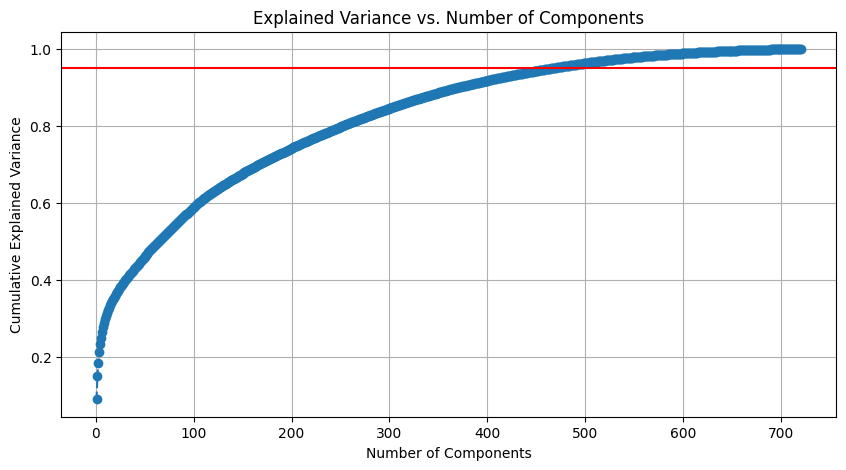

In [149]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## GLCM PCA

In [150]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_glcm)

In [151]:
pca = PCA()
pca.fit(X_scaled)

PCA()

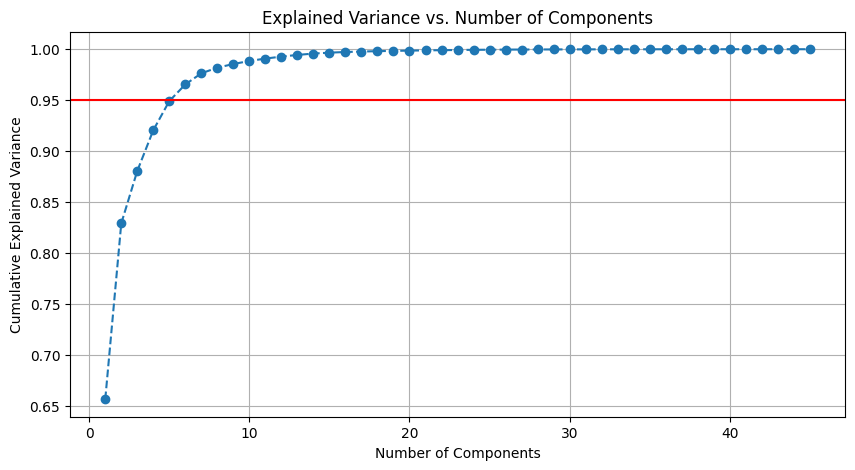

In [152]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## Resnet PCA

In [153]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_resnet)

In [154]:
pca = PCA()
pca.fit(X_scaled)

PCA()

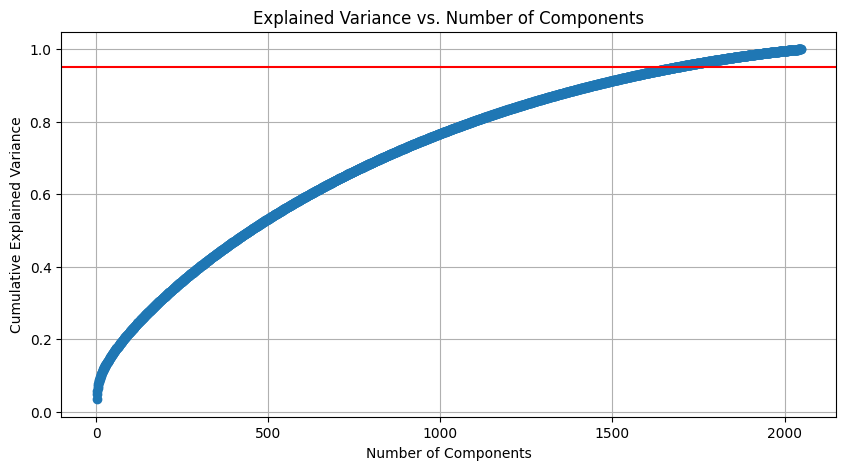

In [155]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [156]:
print(train_resnet.shape)
print(train_hog.shape)
print(train_glcm.shape)

(8449, 2048)
(8449, 720)
(8449, 45)


In [157]:
print(val_resnet.shape)
print(val_hog.shape)
print(val_glcm.shape)

(2821, 2048)
(2821, 720)
(2821, 45)


## Data Prep

In [158]:
resnet_scaler = StandardScaler()
hog_scaler = StandardScaler()
glcm_scaler = StandardScaler()

In [159]:
train_resnet_scaled = resnet_scaler.fit_transform(train_resnet)
train_hog_scaled = hog_scaler.fit_transform(train_hog)
train_glcm_scaled = glcm_scaler.fit_transform(train_glcm)

In [160]:
val_resnet_scaled = resnet_scaler.fit_transform(val_resnet)
val_hog_scaled = hog_scaler.fit_transform(val_hog)
val_glcm_scaled = glcm_scaler.fit_transform(val_glcm)

## Simple Classification

In [161]:
X_train = np.hstack([train_hog_scaled, train_glcm_scaled])
X_val = np.hstack([val_hog_scaled, val_glcm_scaled])

y_train = train_labels
y_val = val_labels

In [162]:
clf_logistic = LogisticRegression(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

0.8444786365250325
0.5079758950726693


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [163]:
clf_sgd = SGDClassifier(max_iter=40, class_weight='balanced').fit(X_train, y_train)
print(clf_sgd.score(X_train, y_train))
print(clf_sgd.score(X_val, y_val))

0.7973724701148065
0.5717830556540234


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [164]:
clf_svm_lin = svm.LinearSVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm_lin.score(X_train, y_train))
print(clf_svm_lin.score(X_val, y_val))

0.9012900935021896
0.5391705069124424


In [165]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9188069594034797
0.5902162353775257


In [166]:
clf_hist = HistGradientBoostingClassifier(class_weight='balanced').fit(X_train, y_train)
print(clf_hist.score(X_train, y_train))
print(clf_hist.score(X_val, y_val))

1.0
0.6451612903225806


## Complex Classification

In [167]:
X_train = train_resnet_scaled
X_val = val_resnet_scaled

y_train = train_labels
y_val = val_labels

In [168]:
clf_logistic = LogisticRegression(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

1.0
0.7922722438851472


In [169]:
clf_sgd = SGDClassifier(max_iter=40, class_weight='balanced').fit(X_train, y_train)
print(clf_sgd.score(X_train, y_train))
print(clf_sgd.score(X_val, y_val))

0.9972777843531779
0.7323644097837646


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [170]:
clf_svm_lin = svm.LinearSVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm_lin.score(X_train, y_train))
print(clf_svm_lin.score(X_val, y_val))

1.0
0.7302375044310528


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [171]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9895845662208546
0.8107054236086494


In [172]:
clf_hist = HistGradientBoostingClassifier(class_weight='balanced').fit(X_train, y_train)
print(clf_hist.score(X_train, y_train))
print(clf_hist.score(X_val, y_val))

1.0
0.7433534207727757


## All Feature

In [173]:
X_train = np.hstack([train_hog_scaled, train_glcm_scaled, train_resnet_scaled])
X_val = np.hstack([val_hog_scaled, val_glcm_scaled, val_resnet_scaled])

y_train = train_labels
y_val = val_labels

In [174]:
clf_logistic = LogisticRegression(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

1.0
0.8057426444523219


In [175]:
clf_sgd = SGDClassifier(max_iter=40, class_weight='balanced').fit(X_train, y_train)
print(clf_sgd.score(X_train, y_train))
print(clf_sgd.score(X_val, y_val))

0.9978695703633567
0.7536334633108827


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [176]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9946739259083915
0.7997164126196384


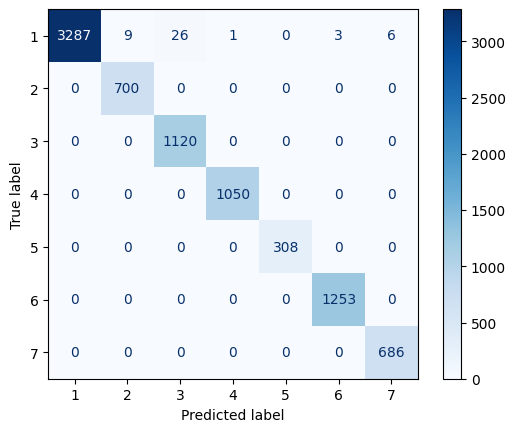

In [177]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

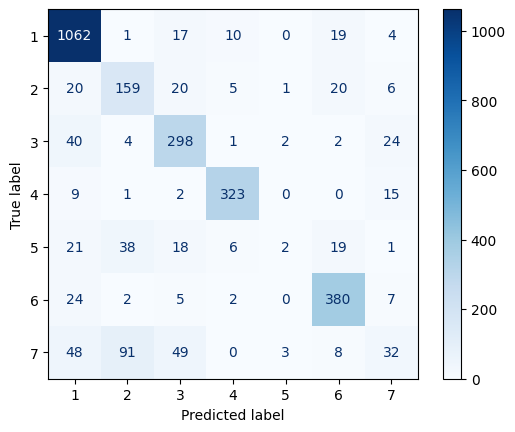

In [178]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

## Compression

In [179]:
pca = PCA(600)
pca.fit(train_resnet_scaled)

PCA(n_components=600)

In [180]:
X_train = np.hstack([pca.transform(train_resnet_scaled)])
X_val = np.hstack([pca.transform(val_resnet_scaled)])

y_train = train_labels
y_val = val_labels

In [181]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9866256361699609
0.8138957816377171


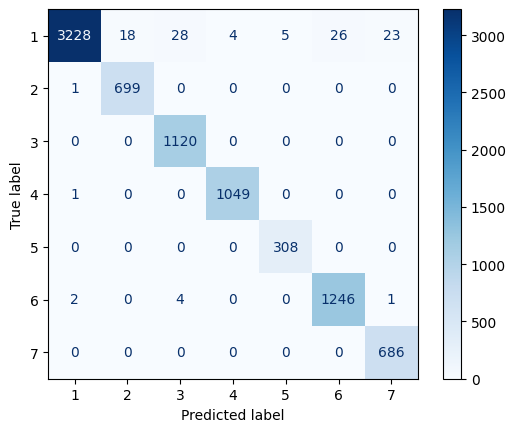

In [182]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

**PCA improved performance for minority classes**

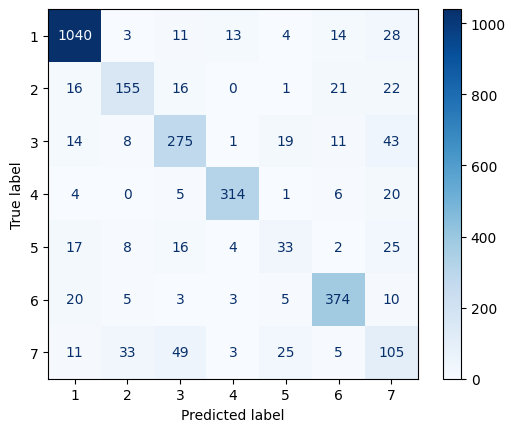

In [183]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Perform on HOG+

In [189]:
pca = PCA(400)
pca.fit(train_hog_scaled)

PCA(n_components=400)

In [190]:
X_train = np.hstack([pca.transform(train_hog_scaled)])
X_val = np.hstack([pca.transform(val_hog_scaled)])

y_train = train_labels
y_val = val_labels

In [191]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.8818795123683276
0.5019496632399858


**Original default SVM without PCA for Hog+**

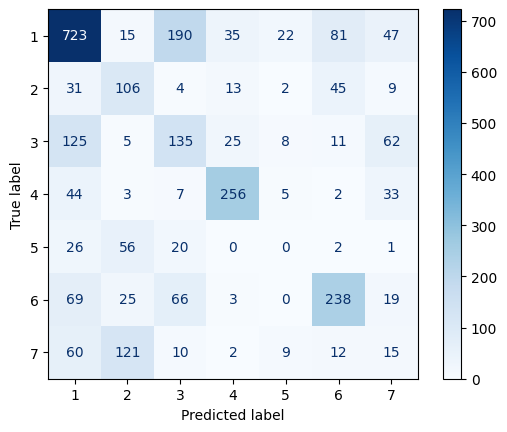

In [ ]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

**After PCA**

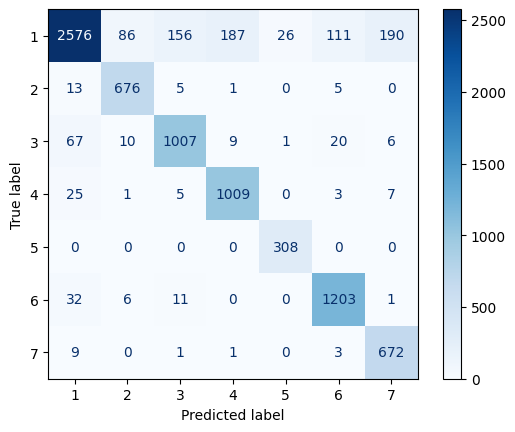

In [192]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

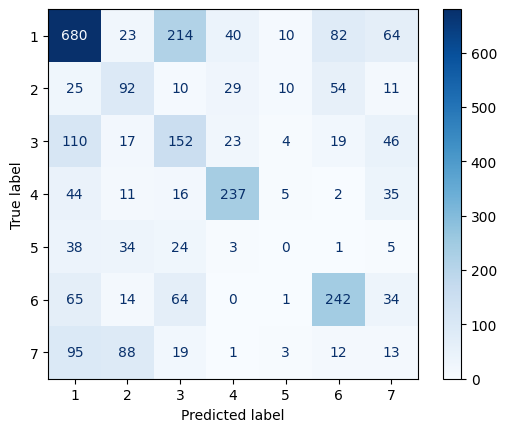

In [193]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Perform on GLCM

In [245]:
pca = PCA(35)
pca.fit(train_glcm_scaled)

PCA(n_components=35)

In [246]:
X_train = np.hstack([pca.transform(train_glcm_scaled)])
X_val = np.hstack([pca.transform(val_glcm_scaled)])

y_train = train_labels
y_val = val_labels

In [247]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.7167712155284649
0.5469691598723857


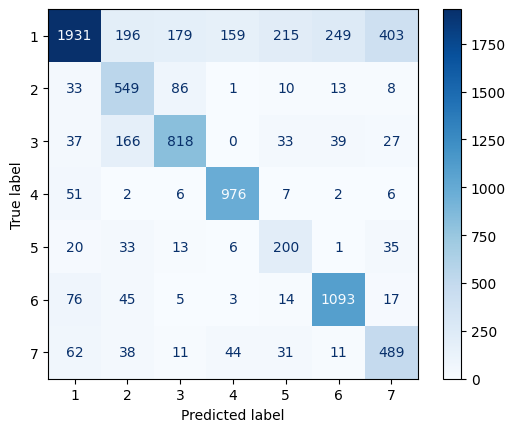

In [248]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

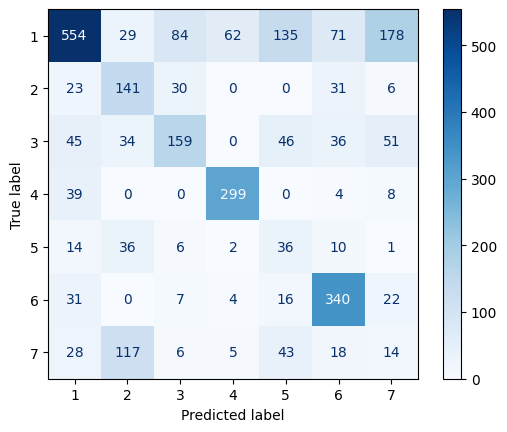

In [249]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

## Grid Search

In [264]:
pca_resnet = PCA(600)
pca_hog = PCA(200)
pca_glcm = PCA(5)

pca_resnet.fit(train_resnet_scaled)
pca_hog.fit(train_hog_scaled)
pca_glcm.fit(train_glcm_scaled)

PCA(n_components=5)

In [265]:
# GLCM was saved already standard scaled
X_train = np.hstack([pca_hog.transform(train_hog_scaled), pca_glcm.transform(train_glcm), pca_resnet.transform(train_resnet_scaled)])
X_val = np.hstack([pca_hog.transform(val_hog_scaled), pca_glcm.transform(val_glcm), pca_resnet.transform(val_resnet_scaled)])

y_train = train_labels
y_val = val_labels

In [266]:
X_combined = np.concatenate([X_train, X_val], axis=0)
y_combined = np.concatenate([y_train, y_val], axis=0)
test_fold = np.concatenate([-1 * np.ones(len(X_train), dtype=int), np.zeros(len(X_val), dtype=int)])

In [ ]:
param_grid = [{
  'C': [4, 5, 6, 7.5, 10, 15],
  'gamma': ['scale', 0.00007, 0.0001, 0.0002, 0.0003, 0.0005],
  'kernel': ['rbf']
}]

ps = PredefinedSplit(test_fold)

clf = GridSearchCV(svm.SVC(class_weight='balanced'),
    param_grid=param_grid,
    n_jobs=2,
    pre_dispatch="n_jobs",
    cv=ps).fit(X_combined, y_combined)

In [268]:
clf.best_params_

{'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}

In [269]:
clf.best_score_

0.761432116270826

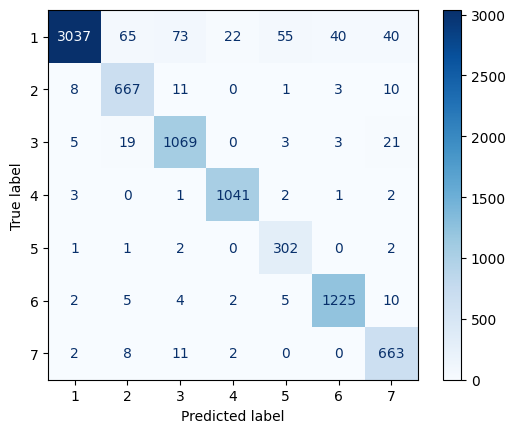

In [277]:
cm = confusion_matrix(y_train, clf.best_estimator_.predict(X_train), labels = clf.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

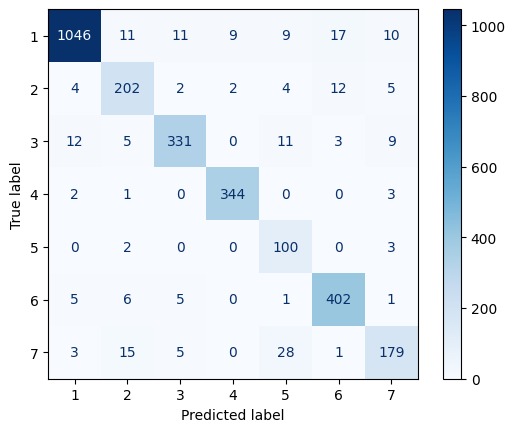

In [278]:
cm = confusion_matrix(y_val, clf.best_estimator_.predict(X_val), labels = clf.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

In [279]:
clf.best_estimator_

SVC(C=15, class_weight='balanced')

In [280]:
clf_svm = svm.SVC(class_weight='balanced', C=15).fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9501716179429518
0.761432116270826


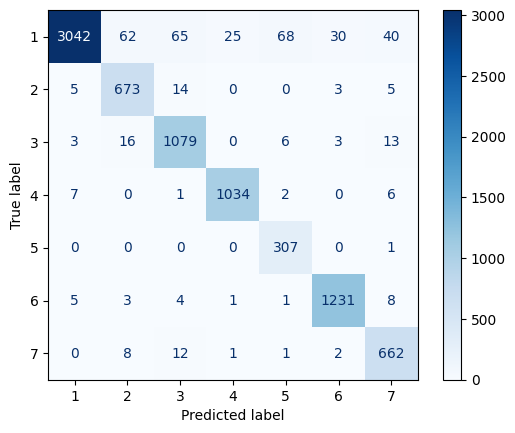

In [281]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

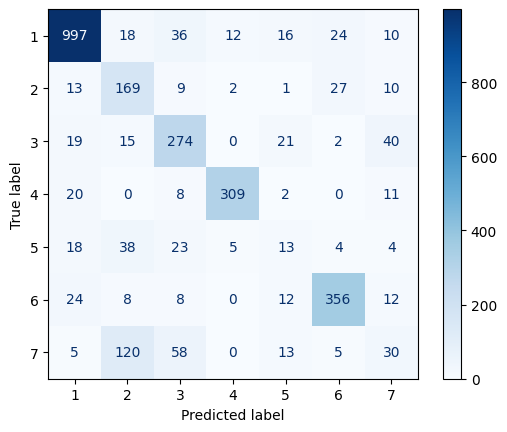

In [282]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()